Using CPU. Note: This module is much faster with a GPU.


[([[74, 18], [186, 18], [186, 50], [74, 50]], '우유와 함께', 0.9783530442599176), ([[50, 44], [206, 44], [206, 76], [50, 76]], '먹울 수 있,으면', 0.5130478648761115), ([[56, 72], [198, 72], [198, 104], [56, 104]], '더 좋앞올 팀데.', 0.19425126859279462)]
['우유와 함께 먹울 수 있,으면 더 좋앞올 팀데.']


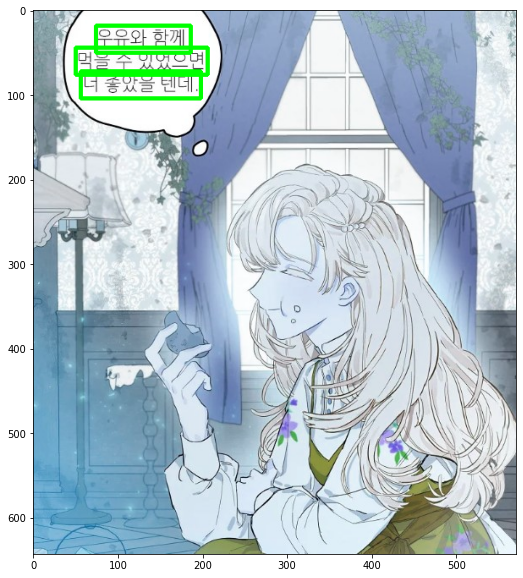

In [1]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

IMAGE_PATH = 'sample_image.jpg'

reader = easyocr.Reader(['en','ko'], gpu=False) 
result = reader.readtext(IMAGE_PATH)
result2 = reader.readtext(IMAGE_PATH,detail=0,paragraph=True)
print(result)
print(result2)

top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
img = cv2.imread(IMAGE_PATH)
spacer = 100

for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    spacer+=15

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


In [2]:
from deep_translator import (GoogleTranslator,
                             MyMemoryTranslator)

def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += ele  
    return str1 
        
hasil = listToString(result2)
print("Original Text: ")
print(hasil)
print("-----------------------")
translated = GoogleTranslator(source='ko', target='en').translate(hasil)
print("Translated (Google Translate):")
print(translated)
print("-----------------------")
translated2 = MyMemoryTranslator(source='ko', target='en').translate(hasil)
print("Translated (MyMemory): ")
print(translated2)

Original Text: 
우유와 함께 먹울 수 있,으면 더 좋앞올 팀데.
-----------------------
Translated (Google Translate):
It would be better if you can eat it with milk.
-----------------------
Translated (MyMemory): 
I can eat it with milk, but it'll be better.


In [3]:
import pandas as pd

a = list(translated)
b = list(translated2)
df = pd.DataFrame(list(zip(a, b)),
               columns =['Google', 'MyMemory'])


df

,Google,MyMemory
0,I,I
1,t,
2,,c
3,w,a
4,o,n
5,u,
6,l,e
7,d,a
8,,t
9,b,
